In [5]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [ ]:
# The ARIMA steps involved are as follows:

# Analyzing the time series data by plotting or visualizing it.
# Converting the time series data in a stationary form.
# Plotting the ACF and PACF plots.
# Constructing the ARIMA model.
# Making predictions using the model created.

In [6]:
# Import the data
# Specify the directory based on the location of your dataset
df = pd.read_csv("EnergyProduction.csv")
df

,DATE,EnergyIndex
0,1970-01-01,43.0869
1,1970-02-01,42.5577
2,1970-03-01,41.6215
3,1970-04-01,40.1982
4,1970-05-01,39.9321
...,...,...
235,1989-08-01,75.2704
236,1989-09-01,69.5107
237,1989-10-01,66.0620
238,1989-11-01,69.2555


In [7]:
# To work with time-series data, the ‘date’ column is converted into DateTime index.
df['DATE'] = pd.to_datetime(df['DATE'])
df.head()

,DATE,EnergyIndex
0,1970-01-01,43.0869
1,1970-02-01,42.5577
2,1970-03-01,41.6215
3,1970-04-01,40.1982
4,1970-05-01,39.9321


In [8]:
df.set_index('DATE',inplace=True)
df.head()

,EnergyIndex
DATE,
1970-01-01,43.0869
1970-02-01,42.5577
1970-03-01,41.6215
1970-04-01,40.1982
1970-05-01,39.9321


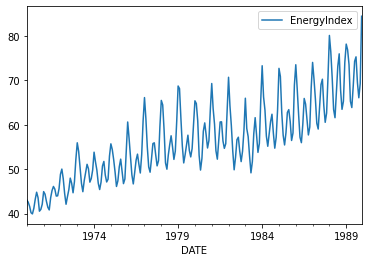

In [9]:
df.plot()
# from the plot, this is seasonal data as there is some seasonality to it and an upward trend too.

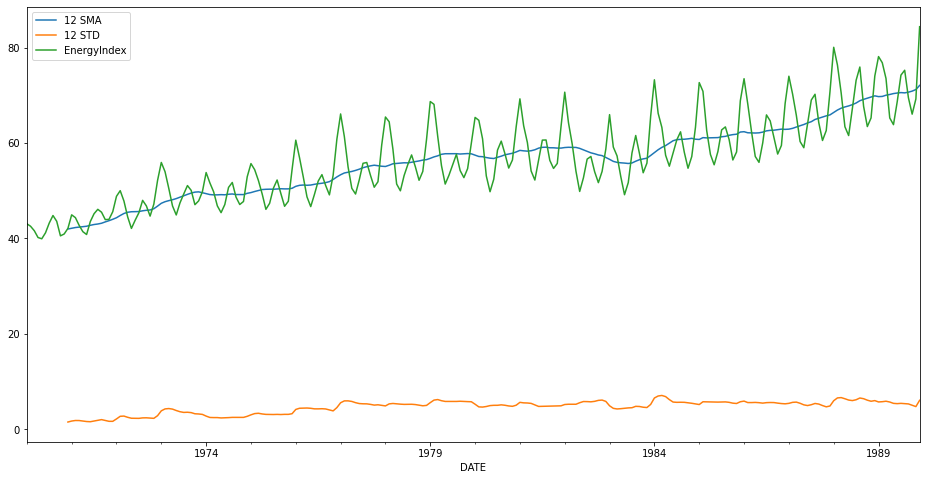

In [10]:
df['EnergyIndex'].rolling(12).mean().plot(label='12 SMA',figsize=(16,8))
df['EnergyIndex'].rolling(12).std().plot(label='12 STD')
df['EnergyIndex'].plot()
plt.legend()
# comparing the 12-month simple moving average along with the series to ascertain the trend. 
# The standard deviation is also plotted to see if there is any variance or no
# from the plot, the standard deviation is not varying much so there is not much variance.

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose

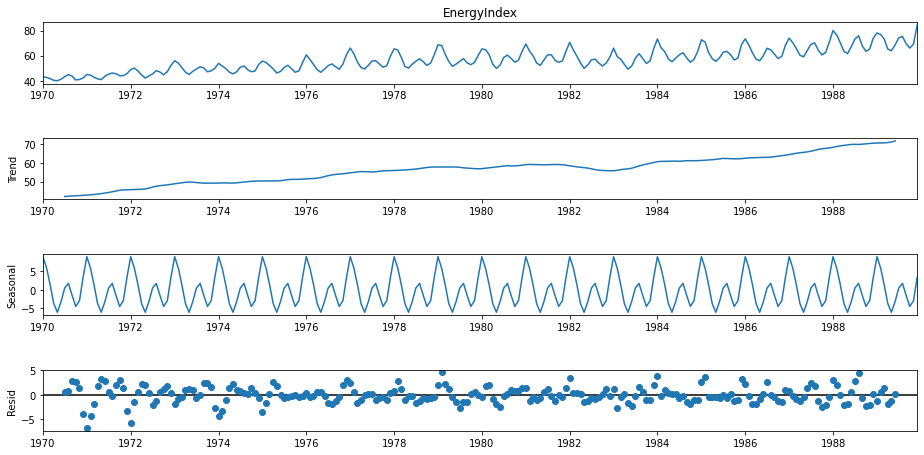

In [12]:
decomp = seasonal_decompose(df['EnergyIndex'])
fig = decomp.plot()
fig.set_size_inches(14,7)
# Decomposition of the time series data to its trend, seasonality and residual components.

In [13]:
# The data is tested using the Dickey-Fuller test to check if the data is in stationary form or no and then change its form.
from statsmodels.tsa.stattools import adfuller

In [14]:
fuller_test = adfuller(df['EnergyIndex'])
fuller_test

(0.44364958939108096,
 0.9830559056338348,
 12,
 227,
 {'1%': -3.4594900381360034,
  '5%': -2.8743581895178485,
  '10%': -2.573601605503697},
 856.5712848771451)

In [15]:
def test_p_value(data):
        fuller_test = adfuller(data)
        print('P-value: ',fuller_test[1])
        if fuller_test[1] <= 0.05:
            print('Reject null hypothesis, data is stationary')
        else:
            print('Do not reject null hypothesis, data is not stationary')

In [16]:
test_p_value(df['EnergyIndex'])
# Since the data is not stationary, differencing is carried out. 
# The difference is the change of the time series from one period to the next. 

P-value:  0.9830559056338348
Do not reject null hypothesis, data is not stationary


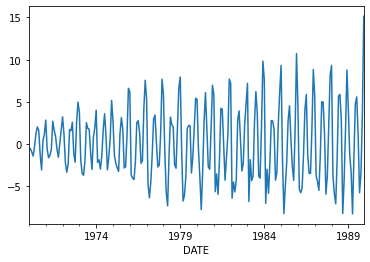

In [17]:
df['First_diff'] = df['EnergyIndex'] - df['EnergyIndex'].shift(1)
df['First_diff'].plot()
#There's seasonal trend in this plot

In [18]:
test_p_value(df['First_diff'].dropna())
#p-value is smaller than 0,05 (significance)

P-value:  4.226559012395382e-06
Reject null hypothesis, data is stationary


In [21]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

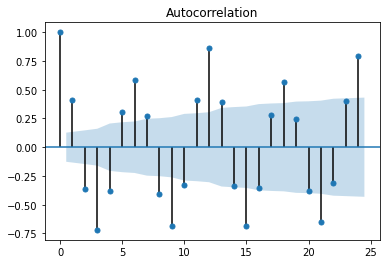

In [22]:
first_diff = plot_acf(df['First_diff'].dropna())
#there's seasonal trend

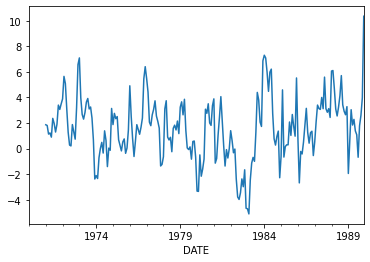

In [23]:
# A seasonal difference can also be taken as follows. The shifting will happen by an entire season that is ‘12’.
df['Seasonal_diff'] = df['EnergyIndex'] - df['EnergyIndex'].shift(12)
df['Seasonal_diff'].plot()

In [24]:
test_p_value(df['Seasonal_diff'].dropna())
#p-value is smaller than 0.05 (significance)

P-value:  0.0029495686210807334
Reject null hypothesis, data is stationary


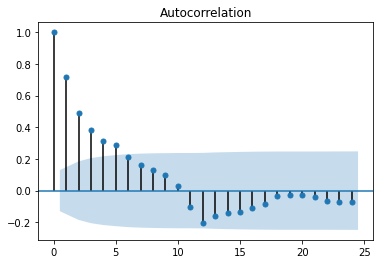

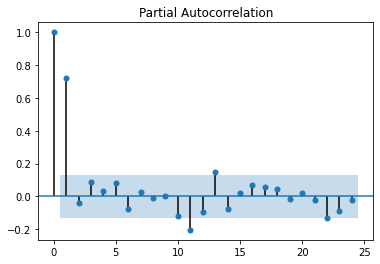

In [25]:
p1 = plot_acf(df['Seasonal_diff'].dropna())
p2 = plot_pacf(df['Seasonal_diff'].dropna())
#From PACF plot, there's cut off at 1
#ACF plot form sinusoidal wave

In [26]:
from statsmodels.tsa.arima_model import ARIMA

In [29]:
model_1 = sm.tsa.statespace.SARIMAX(df['EnergyIndex'],order=(0,1,0),seasonal_order=(1,1,1,12))

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [30]:
model_2 = sm.tsa.statespace.SARIMAX(df['EnergyIndex'],order=(0,1,0),seasonal_order=(1,1,0,12))

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [31]:
results_1 = model_1.fit()
results_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                          EnergyIndex   No. Observations:                  240
Model:             SARIMAX(0, 1, 0)x(1, 1, [1], 12)   Log Likelihood                -425.177
Date:                              Sun, 25 Dec 2022   AIC                            856.353
Time:                                      21:45:29   BIC                            866.628
Sample:                                  01-01-1970   HQIC                           860.499
                                       - 12-01-1989                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.0472      0.129      0.366      0.714      -0.206       0.300
ma.S.L12      -0.5524      0.106     -5.215      0.000      -0.760      -0.345
sigma2         2.4390      0.172     14.161      0.000       2.101       2.777
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                27.42
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               1.89   Skew:                             0.20
Prob(H) (two-sided):                  0.01   Kurtosis:                         4.65
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [32]:
results_2 = model_2.fit()
results_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                        EnergyIndex   No. Observations:                  240
Model:             SARIMAX(0, 1, 0)x(1, 1, 0, 12)   Log Likelihood                -432.267
Date:                            Sun, 25 Dec 2022   AIC                            868.534
Time:                                    21:45:35   BIC                            875.384
Sample:                                01-01-1970   HQIC                           871.298
                                     - 12-01-1989                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.3770      0.063     -5.995      0.000      -0.500      -0.254
sigma2         2.6183      0.177     14.797      0.000       2.272       2.965
===================================================================================
Ljung-Box (L1) (Q):                   0.10   Jarque-Bera (JB):                33.66
Prob(Q):                              0.76   Prob(JB):                         0.00
Heteroskedasticity (H):               2.11   Skew:                             0.21
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.84
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
#bcs model_1 perform smaller AIC, model_1 will be selected

In [33]:
results_1.resid

DATE
1970-01-01    43.086900
1970-02-01    -0.529200
1970-03-01    -0.936200
1970-04-01    -1.423300
1970-05-01    -0.266100
                ...    
1989-08-01    -0.675745
1989-09-01     0.598350
1989-10-01     0.511483
1989-11-01     1.301495
1989-12-01     6.519928
Length: 240, dtype: float64

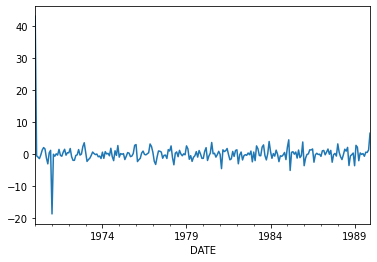

In [34]:
results_1.resid.plot()

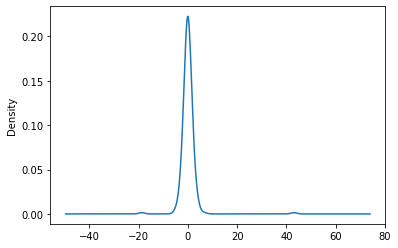

In [35]:
results_1.resid.plot(kind='kde')
# The distribution of the errors can be seen by plotting the KDE. And as seen from the plot below, the errors are distributed around 0 which is good.

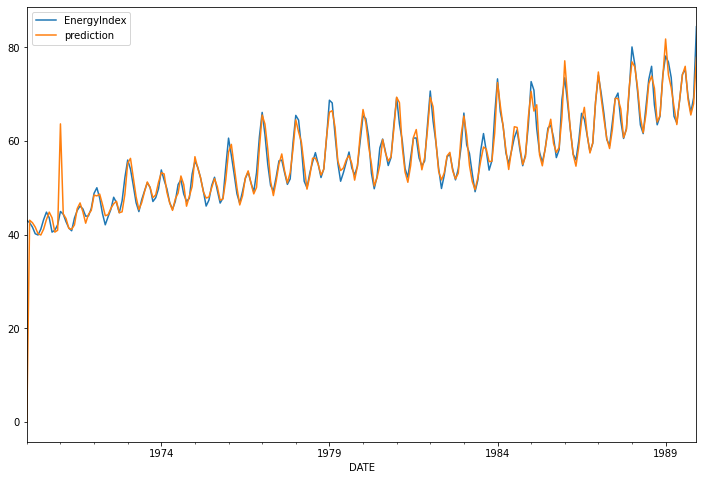

In [36]:
df['prediction'] = results_1.predict()
df[['EnergyIndex','prediction']].plot(figsize=(12,8))
# As seen from the above plot, the model does a good job is predicting the present data. 

In [37]:
from pandas.tseries.offsets import DateOffset
extra_dates = [df.index[-1] + DateOffset(months=m) for m in range (1,24)]

In [38]:
import pandas as pd
from pandas import Timestamp

In [39]:
extra_dates
[Timestamp('1990-01-01 00:00:00'),
 Timestamp('1990-02-01 00:00:00'),
 Timestamp('1990-03-01 00:00:00'),
 Timestamp('1990-04-01 00:00:00'),
 Timestamp('1990-05-01 00:00:00'),
 Timestamp('1990-06-01 00:00:00'),
 Timestamp('1990-07-01 00:00:00'),
 Timestamp('1990-08-01 00:00:00'),
 Timestamp('1990-09-01 00:00:00'),
 Timestamp('1990-10-01 00:00:00'),
 Timestamp('1990-11-01 00:00:00'),
 Timestamp('1990-12-01 00:00:00'),
 Timestamp('1991-01-01 00:00:00'),
 Timestamp('1991-02-01 00:00:00'),
 Timestamp('1991-03-01 00:00:00'),
 Timestamp('1991-04-01 00:00:00'),
 Timestamp('1991-05-01 00:00:00'),
 Timestamp('1991-06-01 00:00:00'),
 Timestamp('1991-07-01 00:00:00'),
 Timestamp('1991-08-01 00:00:00'),
 Timestamp('1991-09-01 00:00:00'),
 Timestamp('1991-10-01 00:00:00'),
 Timestamp('1991-11-01 00:00:00')]

[Timestamp('1990-01-01 00:00:00'),
 Timestamp('1990-02-01 00:00:00'),
 Timestamp('1990-03-01 00:00:00'),
 Timestamp('1990-04-01 00:00:00'),
 Timestamp('1990-05-01 00:00:00'),
 Timestamp('1990-06-01 00:00:00'),
 Timestamp('1990-07-01 00:00:00'),
 Timestamp('1990-08-01 00:00:00'),
 Timestamp('1990-09-01 00:00:00'),
 Timestamp('1990-10-01 00:00:00'),
 Timestamp('1990-11-01 00:00:00'),
 Timestamp('1990-12-01 00:00:00'),
 Timestamp('1991-01-01 00:00:00'),
 Timestamp('1991-02-01 00:00:00'),
 Timestamp('1991-03-01 00:00:00'),
 Timestamp('1991-04-01 00:00:00'),
 Timestamp('1991-05-01 00:00:00'),
 Timestamp('1991-06-01 00:00:00'),
 Timestamp('1991-07-01 00:00:00'),
 Timestamp('1991-08-01 00:00:00'),
 Timestamp('1991-09-01 00:00:00'),
 Timestamp('1991-10-01 00:00:00'),
 Timestamp('1991-11-01 00:00:00')]

In [40]:
forecast_df = pd.DataFrame(index=extra_dates,columns=df.columns)
forecast_df.head()

,EnergyIndex,First_diff,Seasonal_diff,prediction
1990-01-01,NaN,NaN,NaN,NaN
1990-02-01,NaN,NaN,NaN,NaN
1990-03-01,NaN,NaN,NaN,NaN
1990-04-01,NaN,NaN,NaN,NaN
1990-05-01,NaN,NaN,NaN,NaN


In [41]:
final_df = pd.concat([df,forecast_df])

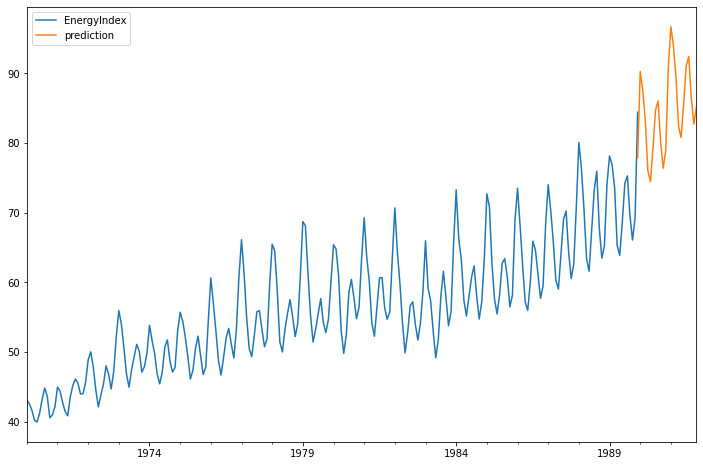

In [42]:
final_df['prediction'] = results_1.predict(start=239, end=430)
final_df[['EnergyIndex','prediction']].plot(figsize=(12,8))

In [43]:
# ARIMA model was successfully used to predict the future values for the energy production which is a seasonal dataset with non-stationary behavior. 
# Using the proper steps, the data was converted to the stationary form and the prediction model was built.